<a href="https://colab.research.google.com/github/lhartson03/psu_quants/blob/main/Quant_Paper_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
y_symbols = ['AAPL']
startdate = datetime(2013,3,16)
AAPL = pdr.get_data_yahoo(y_symbols, start = startdate)

# loads Stock price data 
def loadStockData(tickerList,startDate):
  for ticker in tickerList: 
    tickerList[ticker] = pdr.get_data_yahoo(ticker, start = startdate)['Adj Close']
    pdr.get_data_yahoo()


[*********************100%***********************]  1 of 1 completed


In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as plt
yf.pdr_override()

In [ ]:
y_symbols = ['AAPL']
startdate = datetime(2013,3,16)
AAPL = pdr.get_data_yahoo(y_symbols, start = startdate)

[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2023-03-16,152.160004,156.419998,151.639999,155.850006,155.850006,73752446


In [ ]:
AAPL['daily_return'] = (AAPL['Adj Close'] / (AAPL['Adj Close'].shift(1))) - 1

In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400,-0.013879
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,0.013266
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,0.014089
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,0.002621
2023-03-16,152.160004,156.419998,151.639999,155.850006,155.850006,73752446,0.018694


<Axes: xlabel='Date'>

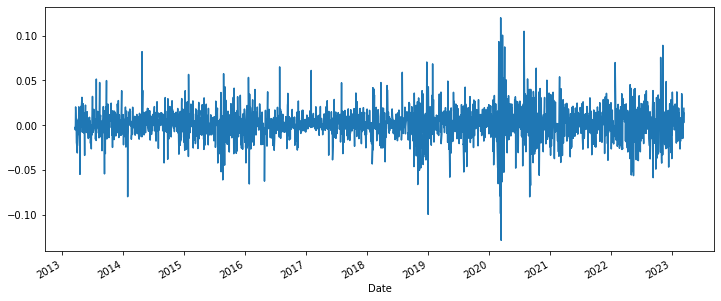

In [ ]:
AAPL['daily_return'].plot(figsize = (12,5))

In [ ]:
# calculating the average daily return
avg_daily_return = AAPL['daily_return'].mean()
avg_daily_return

0.0011200522914460585

In [ ]:
avg_annual_return = avg_daily_return * 250
avg_annual_return

0.2800130728615146

In [ ]:
print(str(round(avg_annual_return, 5) * 100) + '%')

28.000999999999998%


In [ ]:
us_stocks = ['AAPL', 'BBW', 'EPD', 'MCD']

In [ ]:
stocks_data = pd.DataFrame()
startdate = datetime(2013, 3, 16)
for ticker in us_stocks:
  stocks_data[ticker] = pdr.get_data_yahoo(ticker, start = startdate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-18 to 2023-03-16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2518 non-null   float64
 1   BBW     2518 non-null   float64
 2   EPD     2518 non-null   float64
 3   MCD     2518 non-null   float64
dtypes: float64(4)
memory usage: 98.4 KB


<Axes: xlabel='Date'>

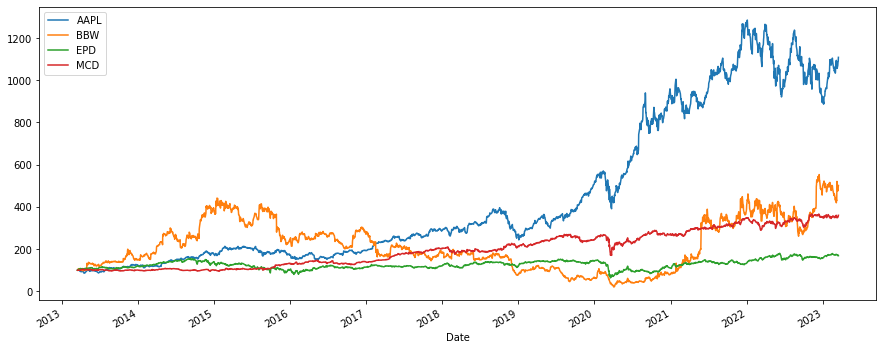

In [ ]:
(stocks_data / stocks_data.iloc[0] * 100).plot(figsize = (15,6))

In [ ]:
returns = (stocks_data / stocks_data.shift(1)) - 1
returns.head()

,AAPL,BBW,EPD,MCD
Date,,,,
2013-03-18,NaN,NaN,NaN,NaN
2013-03-19,-0.002699,0.013780,-0.000532,-0.001725
2013-03-20,-0.005303,0.015534,0.013473,0.003760
2013-03-21,0.001438,0.013384,0.015393,-0.002430
2013-03-22,0.020277,0.024528,0.013609,0.007510


In [ ]:
# weights of the securities in our portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [ ]:
np.dot(returns, weights)

array([        nan,  0.00220607,  0.00686598, ...,  0.02290867,
       -0.00732461,  0.01240092])

In [ ]:
annual_portfolio_return = returns.mean() * 250

In [ ]:
np.dot(annual_portfolio_return, weights)

0.22233675369195527

In [ ]:
class Portfolio:
  def __init__(self, name, cash):
    self.expense_ratio = None
    self.cash = cash
    self.name = name
    self.us_stock_holdings = None
    self.expected_return = None
    self.portfolio_beta = None
    self.variance = None
    self.sharpe_ratio = None
  
  def add_us_stock(self, ticker, price, quantity):
    self.cash -= price * quantity
    
  def portfolio_report(self):
    print("PSU Quants {portfolio} Portfolio".format(portfolio = self.name))
    print("Assets Under Management: {aum}".format(aum = self.cash)) # add all assets later
    print("Cash on Hand: {cash}".format(cash = self.cash))
    print("Return as of {date}: {return_1}".format(date = "2020", return_1 = self.cash))

In [ ]:
test_portfolio = Portfolio('PSU Quant Portfolio', 1000000)

In [ ]:
test_portfolio.portfolio_report()

PSU Quants PSU Quant Portfolio Portfolio
Assets Under Management: 1000000
Cash on Hand: 1000000
Return as of 2020: 1000000
